# importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly_express as px
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

### reading the dataset

In [3]:
df = pd.read_csv('hypothyroid.csv')

In [4]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,P


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [6]:
df.describe(include=object)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,369,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [7]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P


In [8]:
df['binaryClass'].nunique()


2

In [9]:
df['binaryClass'].value_counts()

binaryClass
P    3481
N     291
Name: count, dtype: int64

#### checking for null values

In [10]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [11]:
df.columns.tolist()

['age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'TBG measured',
 'TBG',
 'referral source',
 'binaryClass']

# feature Engineering

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
df['sex'] = le.fit_transform(df['sex'])

In [15]:
a = df['age'] == '?'
df[a]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
1985,?,1,t,f,f,f,f,f,t,f,f,f,f,f,f,f,t,0.6,t,1.5,t,120,t,0.82,t,146,f,?,other,P


In [16]:
df.replace('?',np.nan,inplace=True) 

In [17]:
df[df['age'] == 'NaN'] 


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass


In [18]:
mean_nl = df['age'].astype('float').mean()
df['age'].replace(np.nan,mean_nl,inplace=True) # np.nan means empty sapce
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,1,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,NaN,SVHC,P
1,23,1,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,NaN,f,NaN,f,NaN,other,P
2,46,2,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109,t,0.91,t,120,f,NaN,other,P
3,70,1,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,NaN,f,NaN,f,NaN,other,P
4,70,1,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,NaN,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,1,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,P
3768,68,1,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,NaN,SVI,P
3769,74,1,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,NaN,other,P
3770,72,2,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,NaN,SVI,P


In [19]:
pd.set_option('display.max_columns',None)

In [20]:
df['TBG'].nunique()

0

In [21]:
df.isnull().sum()

age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   object 
 1   sex                        3772 non-null   int32  
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [23]:
mean_tsh = df['TSH'].astype('float').mean()
df['TSH'].replace(np.nan,mean_tsh,inplace=True)

In [24]:
mean_t3 = df['T3'].astype('float').mean()
df['T3'].replace(np.nan,mean_t3,inplace=True)


In [25]:
mean_tt4 = df['TT4'].astype('float').mean()
df['TT4'].replace(np.nan,mean_tt4,inplace=True)


In [26]:
mean_t4U = df['T4U'].astype('float').mean()
df['T4U'].replace(np.nan,mean_t4U,inplace=True)


In [27]:
mean_fti = df['FTI'].astype('float').mean()
df['FTI'].replace(np.nan,mean_fti,inplace=True)


In [28]:
df.isnull().sum()

age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                             0
T3 measured                     0
T3                              0
TT4 measured                    0
TT4                             0
T4U measured                    0
T4U                             0
FTI measured                    0
FTI                             0
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [29]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,1,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,NaN,SVHC,P
1,23,1,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,0.995,f,110.469649,f,NaN,other,P
2,46,2,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,2.0135,t,109,t,0.91,t,120,f,NaN,other,P
3,70,1,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,0.995,f,110.469649,f,NaN,other,P
4,70,1,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,NaN,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,1,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,5.086766,f,2.0135,f,108.319345,f,0.995,f,110.469649,f,NaN,other,P
3768,68,1,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,NaN,SVI,P
3769,74,1,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,NaN,other,P
3770,72,2,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,NaN,SVI,P


In [30]:
df['on thyroxine'] = le.fit_transform(df['on thyroxine'])


In [31]:
df['query on thyroxine'] = le.fit_transform(df['query on thyroxine'])

In [32]:
df['on antithyroid medication'] = le.fit_transform(df['on antithyroid medication'])

In [33]:
df['sick'] = le.fit_transform(df['sick'])


In [34]:
df['pregnant'] = le.fit_transform(df['pregnant'])


In [35]:
df['thyroid surgery'] = le.fit_transform(df['thyroid surgery'])


In [36]:
df['I131 treatment'] = le.fit_transform(df['I131 treatment'])


In [37]:
df['query hyperthyroid'] = le.fit_transform(df['query hyperthyroid'])


In [38]:
df['lithium'] = le.fit_transform(df['lithium'])


In [39]:
df['goitre'] = le.fit_transform(df['goitre'])


In [40]:
df['tumor'] = le.fit_transform(df['tumor'])


In [41]:
df['hypopituitary'] = le.fit_transform(df['hypopituitary'])


In [42]:
df['psych'] = le.fit_transform(df['psych'])


In [43]:
df['TSH measured'] = le.fit_transform(df['TSH measured'])


In [44]:
df['query hypothyroid'] = le.fit_transform(df['query hypothyroid'])


In [45]:
df['T3 measured'] = le.fit_transform(df['T3 measured'])


In [46]:
df['TT4 measured'] = le.fit_transform(df['TT4 measured'])


In [47]:
df['T4U measured'] = le.fit_transform(df['T4U measured'])


In [48]:
df['FTI measured'] = le.fit_transform(df['FTI measured'])


In [49]:
df['TBG measured'] = le.fit_transform(df['TBG measured'])


In [50]:
df['TBG'] = le.fit_transform(df['TBG'])


In [51]:
df['referral source'] = le.fit_transform(df['referral source'])


In [52]:
df['binaryClass'] = le.fit_transform(df['binaryClass'])


In [53]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,2.5,1,125,1,1.14,1,109,0,0,1,1
1,23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.1,1,2,1,102,0,0.995,0,110.469649,0,0,4,1
2,46,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.98,0,2.0135,1,109,1,0.91,1,120,0,0,4,1
3,70,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.16,1,1.9,1,175,0,0.995,0,110.469649,0,0,4,1
4,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.72,1,1.2,1,61,1,0.87,1,70,0,0,3,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   int32 
 2   on thyroxine               3772 non-null   int32 
 3   query on thyroxine         3772 non-null   int32 
 4   on antithyroid medication  3772 non-null   int32 
 5   sick                       3772 non-null   int32 
 6   pregnant                   3772 non-null   int32 
 7   thyroid surgery            3772 non-null   int32 
 8   I131 treatment             3772 non-null   int32 
 9   query hypothyroid          3772 non-null   int32 
 10  query hyperthyroid         3772 non-null   int32 
 11  lithium                    3772 non-null   int32 
 12  goitre                     3772 non-null   int32 
 13  tumor                      3772 non-null   int32 
 14  hypopitu

In [55]:
df['age']= df['age'].astype(int)

In [56]:
df['TSH'] = df['TSH'].astype(float)

In [57]:
df['TT4'] = df['TT4'].astype(float)


In [58]:
df['FTI'] = df['FTI'].astype(float)


In [59]:
df['T4U'] = df['T4U'].astype(float)


In [60]:
df['T3'] = df['T3'].astype(float)


In [61]:
df['TSH'] = df['TSH'].astype(float)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   int32  
 1   sex                        3772 non-null   int32  
 2   on thyroxine               3772 non-null   int32  
 3   query on thyroxine         3772 non-null   int32  
 4   on antithyroid medication  3772 non-null   int32  
 5   sick                       3772 non-null   int32  
 6   pregnant                   3772 non-null   int32  
 7   thyroid surgery            3772 non-null   int32  
 8   I131 treatment             3772 non-null   int32  
 9   query hypothyroid          3772 non-null   int32  
 10  query hyperthyroid         3772 non-null   int32  
 11  lithium                    3772 non-null   int32  
 12  goitre                     3772 non-null   int32  
 13  tumor                      3772 non-null   int32

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
df['on antithyroid medication'].value_counts()

on antithyroid medication
0    3729
1      43
Name: count, dtype: int64

In [65]:
df['TBG'].value_counts()

TBG
0    3772
Name: count, dtype: int64

In [66]:
column=['TBG measured','TBG']
df.drop(columns=column,axis=1,inplace=True)

In [67]:
df.columns.tolist()

['age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'referral source',
 'binaryClass']

# creating a model

In [68]:
X1 = df[['age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'referral source']].values
Y1 = df['binaryClass'].values

# Pass 1

In [69]:
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the random forest model on each partition
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the random forest model on the training set
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Test the random forest model on the test set
    y_pred = model.predict(X_test)
    predicted_integers = [int(round(value)) for value in y_pred]

    print(classification_report(y_test,predicted_integers))

    
    print('-'*25)


Partition 1:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       1.00      1.00      1.00       697

    accuracy                           1.00       755
   macro avg       1.00      0.99      1.00       755
weighted avg       1.00      1.00      1.00       755

-------------------------
Partition 2:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       1.00      1.00      1.00       701

    accuracy                           1.00       755
   macro avg       1.00      0.99      0.99       755
weighted avg       1.00      1.00      1.00       755

-------------------------
Partition 3:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        66
           1       1.00      1.00      1.00       688

    accuracy                           1.00       754
   macro avg       0.99      0.99    

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      1.00      1.00       704

    accuracy                           1.00       754
   macro avg       0.98      1.00      0.99       754
weighted avg       1.00      1.00      1.00       754

-------------------------
Partition 5:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       1.00      1.00      1.00       691

    accuracy                           1.00       754
   macro avg       0.98      0.99      0.99       754
weighted avg       1.00      1.00      1.00       754

-------------------------


# Pass 2

In [70]:
# df3 = pd.DataFrame(columns=['Partition','Sub partition','MSE','MAE','RMSE','Accuracy']) # creating an empty Dataframe with some columns


In [71]:
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
# print(indices)
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the model on different partitions
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the machine learning model on the training set
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Test the machine learning model on the remaining partitions
    for j, (train_index2, test_index2) in enumerate(kf.split(X)):
        if j != i:
            X_train2, X_test2 = X[train_index2], X[test_index2]
            y_train2, y_test2 = y[train_index2], y[test_index2]
            
            y_pred = model.predict(X_test2)
            predicted_integers = [int(round(value)) for value in y_pred]
            print(classification_report(y_test2,predicted_integers))      
            print("-"*50)
    print('-'*55)

Partition 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00       701

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00       688

    accuracy                           1.00       754
   macro avg       1.00      1.00      1.00       754
weighted avg       1.00      1.00      1.00       754

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00       704

    accuracy                           1.00       754
   macro avg 

In [72]:
df['binaryClass'].value_counts()

binaryClass
1    3481
0     291
Name: count, dtype: int64

# Pass 1 with confusion matrix

In [73]:
dff = pd.DataFrame(columns=['Partition','Precision','recall','F-score','FPR','Accuracy','Sensitivity','Specificity']) # creating empty data frame with some column

In [74]:
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the random forest model on each partition
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the random forest model on the training set
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Test the random forest model on the test set
    y_pred = model.predict(X_test)
    predicted_integers = [int(round(value)) for value in y_pred]

    a = confusion_matrix(y_test,predicted_integers)

    precision = a[0][0]/(a[0][0]+a[0][1])
    recall = a[0][0]/(a[0][0]+a[1][0])
    F_score = (2*(precision*recall))/(precision+recall)
    Fal_ps_r = a[0][1]/(a[0][1]+a[1][1])
    Accuracy = (a[0][0]+a[1][1])/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
    Sensitivity = a[0][0]/(a[0][0]+a[1][0])
    Specificity = a[1][1]/(a[1][1]+a[0][1])

    row = [i+1,precision,recall,F_score,Fal_ps_r,Accuracy,Sensitivity,Specificity]
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"F-score: {F_score}")
    print(f"FPR:{Fal_ps_r} ")
    print(f"Accuracy: {Accuracy}")
    print(f"Sensitivity: {Sensitivity}")
    print(f"Specificity: {Specificity}")

    dff.loc[len(dff)] = row 

    
    print('-'*25)


Partition 1:


precision: 0.9827586206896551
recall: 1.0
F-score: 0.9913043478260869
FPR:0.0014326647564469914 
Accuracy: 0.9986754966887417
Sensitivity: 1.0
Specificity: 0.998567335243553
-------------------------
Partition 2:
precision: 0.9814814814814815
recall: 1.0
F-score: 0.9906542056074767
FPR:0.0014245014245014246 
Accuracy: 0.9986754966887417
Sensitivity: 1.0
Specificity: 0.9985754985754985
-------------------------
Partition 3:
precision: 0.9848484848484849
recall: 0.9848484848484849
F-score: 0.9848484848484849
FPR:0.0014534883720930232 
Accuracy: 0.9973474801061007
Sensitivity: 0.9848484848484849
Specificity: 0.998546511627907
-------------------------
Partition 4:
precision: 1.0
recall: 0.9615384615384616
F-score: 0.9803921568627451
FPR:0.0 
Accuracy: 0.9973474801061007
Sensitivity: 0.9615384615384616
Specificity: 1.0
-------------------------
Partition 5:
precision: 0.9841269841269841
recall: 0.96875
F-score: 0.9763779527559054
FPR:0.0014492753623188406 
Accuracy: 0.9960212201591512
Sens

In [75]:
dff

,Partition,Precision,recall,F-score,FPR,Accuracy,Sensitivity,Specificity
0,1.0,0.982759,1.000000,0.991304,0.001433,0.998675,1.000000,0.998567
1,2.0,0.981481,1.000000,0.990654,0.001425,0.998675,1.000000,0.998575
2,3.0,0.984848,0.984848,0.984848,0.001453,0.997347,0.984848,0.998547
3,4.0,1.000000,0.961538,0.980392,0.000000,0.997347,0.961538,1.000000
4,5.0,0.984127,0.968750,0.976378,0.001449,0.996021,0.968750,0.998551


# Pass 2 with confusion matrix

In [76]:
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
# print(indices)
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the model on different partitions
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the machine learning model on the training set
    model = RandomForestRegressor(n_estimators=200, random_state=20)
    model.fit(X_train, y_train)

    # Test the machine learning model on the remaining partitions
    for j, (train_index2, test_index2) in enumerate(kf.split(X)):
        if j != i:
            X_train2, X_test2 = X[train_index2], X[test_index2]
            y_train2, y_test2 = y[train_index2], y[test_index2]
            
            y_pred = model.predict(X_test2)
            predicted_integers = [int(round(value)) for value in y_pred]
            a = confusion_matrix(y_test2,predicted_integers)

            
            precision = a[0][0]/(a[0][0]+a[0][1])
            recall = a[0][0]/(a[0][0]+a[1][0])
            F_score = (2*(precision*recall))/(precision+recall)
            Fal_ps_r = a[0][1]/(a[0][1]+a[1][1])
            Accuracy = (a[0][0]+a[1][1])/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
            Sensitivity = a[0][0]/(a[0][0]+a[1][0])
            Specificity = a[1][1]/(a[1][1]+a[0][1]) 

            print(f"precision: {precision}")
            print(f"recall: {recall}")
            print(f"F-score: {F_score}")
            print(f"FPR:{Fal_ps_r} ")
            print(f"Accuracy: {Accuracy}")
            print(f"Sensitivity: {Sensitivity}")
            print(f"Specificity: {Specificity}")   
            print("-"*50)
    print('-'*55)

Partition 1:
precision: 1.0
recall: 1.0
F-score: 1.0
FPR:0.0 
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
--------------------------------------------------
precision: 1.0
recall: 1.0
F-score: 1.0
FPR:0.0 
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
--------------------------------------------------
precision: 1.0
recall: 1.0
F-score: 1.0
FPR:0.0 
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
--------------------------------------------------
precision: 1.0
recall: 1.0
F-score: 1.0
FPR:0.0 
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
--------------------------------------------------
-------------------------------------------------------
Partition 2:
precision: 1.0
recall: 1.0
F-score: 1.0
FPR:0.0 
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
--------------------------------------------------
precision: 1.0
recall: 1.0
F-score: 1.0
FPR:0.0 
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
--------------------------------------------------
precision: 1.0
recall: 1.0
F-s

# below content is for testing(sample):

In [77]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix
from sklearn import metrics
import numpy as np

# Load your dataset here
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the random forest model on each partition
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the random forest model on the training set
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Test the random forest model on the test set
    y_pred = model.predict(X_test)
    predicted_integers = [int(round(value)) for value in y_pred]
    # print('prediction',predicted_integers)
    a= confusion_matrix(y_test,predicted_integers)
    print(classification_report(y_test,predicted_integers))
    print('precision',(a[0][0]/(a[0][0]+a[0][1])))
    print("classification",a)

    print('-'*25)

    # print('test',y_test)
    # print('-'*35)


Partition 1:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       1.00      1.00      1.00       697

    accuracy                           1.00       755
   macro avg       1.00      0.99      1.00       755
weighted avg       1.00      1.00      1.00       755

precision 0.9827586206896551
classification [[ 57   1]
 [  0 697]]
-------------------------
Partition 2:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       1.00      1.00      1.00       701

    accuracy                           1.00       755
   macro avg       1.00      0.99      0.99       755
weighted avg       1.00      1.00      1.00       755

precision 0.9814814814814815
classification [[ 53   1]
 [  0 701]]
-------------------------
Partition 3:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        66
           1

# training whole dataset

In [78]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,binaryClass
0,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.300000,1,2.5000,1,125.000000,1,1.140,1,109.000000,1,1
1,23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.100000,1,2.0000,1,102.000000,0,0.995,0,110.469649,4,1
2,46,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.980000,0,2.0135,1,109.000000,1,0.910,1,120.000000,4,1
3,70,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.160000,1,1.9000,1,175.000000,0,0.995,0,110.469649,4,1
4,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.720000,1,1.2000,1,61.000000,1,0.870,1,70.000000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5.086766,0,2.0135,0,108.319345,0,0.995,0,110.469649,4,1
3768,68,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.000000,1,2.1000,1,124.000000,1,1.080,1,114.000000,3,1
3769,74,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,5.100000,1,1.8000,1,112.000000,1,1.070,1,105.000000,4,1
3770,72,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.700000,1,2.0000,1,82.000000,1,0.940,1,87.000000,3,1


In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=0.2,random_state=0)

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rfc = RandomForestRegressor(n_estimators=200)

In [82]:
rfc.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=200)

In [83]:
pred = rfc.predict(X_test)
predicted_integers = [int(round(value)) for value in pred]


In [84]:
print(classification_report(Y_test,predicted_integers))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       686

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755



# Plotting the graph for Pass 1

In [85]:
X1 = df[['age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'referral source']].values
Y1 = df['binaryClass'].values

In [86]:
dff = pd.DataFrame(columns=['Partition','Precision','recall','F-score','FPR','Accuracy','Sensitivity','Specificity']) # creating empty data frame with some column

In [87]:
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the random forest model on each partition
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the random forest model on the training set
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Test the random forest model on the test set
    y_pred = model.predict(X_test)
    predicted_integers = [int(round(value)) for value in y_pred]

    a = confusion_matrix(y_test,predicted_integers)

    precision = a[0][0]/(a[0][0]+a[0][1])
    recall = a[0][0]/(a[0][0]+a[1][0])
    F_score = (2*(precision*recall))/(precision+recall)
    Fal_ps_r = a[0][1]/(a[0][1]+a[1][1])
    Accuracy = (a[0][0]+a[1][1])/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
    Sensitivity = a[0][0]/(a[0][0]+a[1][0])
    Specificity = a[1][1]/(a[1][1]+a[0][1])

    row = [i+1,precision,recall,F_score,Fal_ps_r,Accuracy,Sensitivity,Specificity]
    # print(f"precision: {precision}")
    # print(f"recall: {recall}")
    # print(f"F-score: {F_score}")
    # print(f"FPR:{Fal_ps_r} ")
    # print(f"Accuracy: {Accuracy}")
    # print(f"Sensitivity: {Sensitivity}")
    # print(f"Specificity: {Specificity}")

    dff.loc[len(dff)] = row 

    
    # print('-'*25)


In [88]:
dff

,Partition,Precision,recall,F-score,FPR,Accuracy,Sensitivity,Specificity
0,1.0,0.982759,1.000000,0.991304,0.001433,0.998675,1.000000,0.998567
1,2.0,0.981481,1.000000,0.990654,0.001425,0.998675,1.000000,0.998575
2,3.0,0.984848,0.984848,0.984848,0.001453,0.997347,0.984848,0.998547
3,4.0,1.000000,0.961538,0.980392,0.000000,0.997347,0.961538,1.000000
4,5.0,0.984127,0.968750,0.976378,0.001449,0.996021,0.968750,0.998551


# Visualization

In [89]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [90]:
fig2 = dff.iplot(kind='bar',x='Partition',y='Precision',title='Evaluations in Each Partitions',xTitle='Partitions',yTitle='Evaluation Percentage',categories="Partition",asFigure=True)
fig2

In [91]:
fig3 = px.scatter_3d(dff,
        x='Partition', y='Precision', z='Accuracy',
        color="Partition")
fig3

In [92]:
fig4 = px.scatter_3d(dff,
        x='Partition', y='recall', z='Accuracy',
        color="Partition")
fig4

# plotting graph for Pass 2

In [93]:
df3 = pd.DataFrame(columns=['Partition','Sub partition','Precision','recall','F-score','FPR','Accuracy','Sensitivity','Specificity']) # creating an empty Dataframe with some columns

In [94]:
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
# print(indices)
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the model on different partitions
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the machine learning model on the training set
    model = RandomForestRegressor(n_estimators=200, random_state=20)
    model.fit(X_train, y_train)

    # Test the machine learning model on the remaining partitions
    for j, (train_index2, test_index2) in enumerate(kf.split(X)):
        if j != i:
            X_train2, X_test2 = X[train_index2], X[test_index2]
            y_train2, y_test2 = y[train_index2], y[test_index2]
            
            y_pred = model.predict(X_test2)
            predicted_integers = [int(round(value)) for value in y_pred]
            a = confusion_matrix(y_test2,predicted_integers)

            
            precision = a[0][0]/(a[0][0]+a[0][1])
            recall = a[0][0]/(a[0][0]+a[1][0])
            F_score = (2*(precision*recall))/(precision+recall)
            Fal_ps_r = a[0][1]/(a[0][1]+a[1][1])
            Accuracy = (a[0][0]+a[1][1])/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
            Sensitivity = a[0][0]/(a[0][0]+a[1][0])
            Specificity = a[1][1]/(a[1][1]+a[0][1]) 

            # print(f"precision: {precision}")
            # print(f"recall: {recall}")
            # print(f"F-score: {F_score}")
            # print(f"FPR:{Fal_ps_r} ")
            # print(f"Accuracy: {Accuracy}")
            # print(f"Sensitivity: {Sensitivity}")
            # print(f"Specificity: {Specificity}") 
            row = [i+1,j+1,precision,recall,F_score,Fal_ps_r,Accuracy,Sensitivity,Specificity]
            df3.loc[len(df3)] = row # inserting evaluation data in a dataframe
    #         print("-"*50)
    # print('-'*55)

In [95]:
df3

,Partition,Sub partition,Precision,recall,F-score,FPR,Accuracy,Sensitivity,Specificity
0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,1.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.0,4.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,1.0,5.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
5,2.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
6,2.0,4.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
7,2.0,5.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
8,3.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
9,3.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


# SVM

## Pass 1

In [96]:
from sklearn.svm import SVC

In [97]:
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the random forest model on each partition
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the random forest model on the training set
    model = SVC()
    model.fit(X_train, y_train)

    # Test the random forest model on the test set
    y_pred = model.predict(X_test)
    predicted_integers = [int(round(value)) for value in y_pred]

    print(classification_report(y_test,predicted_integers))

    
    print('-'*25)


Partition 1:
              precision    recall  f1-score   support

           0       0.88      0.40      0.55        58
           1       0.95      1.00      0.97       697

    accuracy                           0.95       755
   macro avg       0.92      0.70      0.76       755
weighted avg       0.95      0.95      0.94       755

-------------------------
Partition 2:
              precision    recall  f1-score   support

           0       0.81      0.24      0.37        54
           1       0.94      1.00      0.97       701

    accuracy                           0.94       755
   macro avg       0.88      0.62      0.67       755
weighted avg       0.94      0.94      0.93       755

-------------------------
Partition 3:
              precision    recall  f1-score   support

           0       0.87      0.41      0.56        66
           1       0.95      0.99      0.97       688

    accuracy                           0.94       754
   macro avg       0.91      0.70    

## Pass 2

In [98]:
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
# print(indices)
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the model on different partitions
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the machine learning model on the training set
    model = SVC()
    model.fit(X_train, y_train)

    # Test the machine learning model on the remaining partitions
    for j, (train_index2, test_index2) in enumerate(kf.split(X)):
        if j != i:
            X_train2, X_test2 = X[train_index2], X[test_index2]
            y_train2, y_test2 = y[train_index2], y[test_index2]
            
            y_pred = model.predict(X_test2)
            predicted_integers = [int(round(value)) for value in y_pred]
            print(classification_report(y_test2,predicted_integers))      
            print("-"*50)
    print('-'*55)

Partition 1:
              precision    recall  f1-score   support

           0       0.87      0.24      0.38        54
           1       0.94      1.00      0.97       701

    accuracy                           0.94       755
   macro avg       0.91      0.62      0.67       755
weighted avg       0.94      0.94      0.93       755

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.41      0.56        66
           1       0.95      0.99      0.97       688

    accuracy                           0.94       754
   macro avg       0.91      0.70      0.76       754
weighted avg       0.94      0.94      0.93       754

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.48      0.62        50
           1       0.96      0.99      0.98       704

    accuracy                           0.96       754
   macro avg 

# Decision Tree

# Pass 1

In [99]:
from sklearn import tree

In [100]:
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the random forest model on each partition
for i, (train_index, test_index) in enumerate(kf.split(X)) :
    print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the random forest model on the training set
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Test the random forest model on the test set
    y_pred = model.predict(X_test)
    predicted_integers = [int(round(value)) for value in y_pred]

    print(classification_report(y_test,predicted_integers))

    
    print('-'*25)


Partition 1:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       1.00      1.00      1.00       697

    accuracy                           1.00       755
   macro avg       1.00      0.99      1.00       755
weighted avg       1.00      1.00      1.00       755

-------------------------
Partition 2:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       1.00      1.00      1.00       701

    accuracy                           1.00       755
   macro avg       0.99      0.98      0.98       755
weighted avg       1.00      1.00      1.00       755

-------------------------
Partition 3:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        66
           1       1.00      1.00      1.00       688

    accuracy                           0.99       754
   macro avg       0.98      0.98    

# Pass 2

In [101]:
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
# print(indices)
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the model on different partitions
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the machine learning model on the training set
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Test the machine learning model on the remaining partitions
    for j, (train_index2, test_index2) in enumerate(kf.split(X)):
        if j != i:
            X_train2, X_test2 = X[train_index2], X[test_index2]
            y_train2, y_test2 = y[train_index2], y[test_index2]
            
            y_pred = model.predict(X_test2)
            predicted_integers = [int(round(value)) for value in y_pred]
            print(classification_report(y_test2,predicted_integers))      
            print("-"*50)
    print('-'*55)

Partition 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00       701

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00       688

    accuracy                           1.00       754
   macro avg       1.00      1.00      1.00       754
weighted avg       1.00      1.00      1.00       754

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00       704

    accuracy                           1.00       754
   macro avg 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00       691

    accuracy                           1.00       754
   macro avg       1.00      1.00      1.00       754
weighted avg       1.00      1.00      1.00       754

--------------------------------------------------
-------------------------------------------------------
Partition 4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       697

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00       701

    accurac

# Combination of all three Algorithm

In [102]:
cdf = pd.DataFrame(columns=['Algorithm','Partition','Precision','recall','F-score','FPR','Accuracy','Sensitivity','Specificity']) # creating empty data frame with some column


## Pass 1

In [103]:
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the random forest model on each partition
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the random forest model on the training set
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Test the random forest model on the test set
    y_pred = model.predict(X_test)
    predicted_integers = [int(round(value)) for value in y_pred]

    a = confusion_matrix(y_test,predicted_integers)

    precision = a[0][0]/(a[0][0]+a[0][1])
    recall = a[0][0]/(a[0][0]+a[1][0])
    F_score = (2*(precision*recall))/(precision+recall)
    Fal_ps_r = a[0][1]/(a[0][1]+a[1][1])
    Accuracy = (a[0][0]+a[1][1])/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
    Sensitivity = a[0][0]/(a[0][0]+a[1][0])
    Specificity = a[1][1]/(a[1][1]+a[0][1])

    row = ['RF',i+1,precision,recall,F_score,Fal_ps_r,Accuracy,Sensitivity,Specificity]
    # print(f"precision: {precision}")
    # print(f"recall: {recall}")
    # print(f"F-score: {F_score}")
    # print(f"FPR:{Fal_ps_r} ")
    # print(f"Accuracy: {Accuracy}")
    # print(f"Sensitivity: {Sensitivity}")
    # print(f"Specificity: {Specificity}")

    cdf.loc[len(cdf)] = row 

    
# SVM

X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the random forest model on each partition
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the random forest model on the training set
    model = SVC()
    model.fit(X_train, y_train)

    # Test the random forest model on the test set
    y_pred = model.predict(X_test)
    predicted_integers = [int(round(value)) for value in y_pred]

    a = confusion_matrix(y_test,predicted_integers)

    precision = a[0][0]/(a[0][0]+a[0][1])
    recall = a[0][0]/(a[0][0]+a[1][0])
    F_score = (2*(precision*recall))/(precision+recall)
    Fal_ps_r = a[0][1]/(a[0][1]+a[1][1])
    Accuracy = (a[0][0]+a[1][1])/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
    Sensitivity = a[0][0]/(a[0][0]+a[1][0])
    Specificity = a[1][1]/(a[1][1]+a[0][1])

    row = ['SVM',i+1,precision,recall,F_score,Fal_ps_r,Accuracy,Sensitivity,Specificity]
    # print(f"precision: {precision}")
    # print(f"recall: {recall}")
    # print(f"F-score: {F_score}")
    # print(f"FPR:{Fal_ps_r} ")
    # print(f"Accuracy: {Accuracy}")
    # print(f"Sensitivity: {Sensitivity}")
    # print(f"Specificity: {Specificity}")

    cdf.loc[len(cdf)] = row 

    
# Decision Tree

X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the random forest model on each partition
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the random forest model on the training set
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Test the random forest model on the test set
    y_pred = model.predict(X_test)
    predicted_integers = [int(round(value)) for value in y_pred]

    a = confusion_matrix(y_test,predicted_integers)

    precision = a[0][0]/(a[0][0]+a[0][1])
    recall = a[0][0]/(a[0][0]+a[1][0])
    F_score = (2*(precision*recall))/(precision+recall)
    Fal_ps_r = a[0][1]/(a[0][1]+a[1][1])
    Accuracy = (a[0][0]+a[1][1])/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
    Sensitivity = a[0][0]/(a[0][0]+a[1][0])
    Specificity = a[1][1]/(a[1][1]+a[0][1])

    row = ['Decision Tree',i+1,precision,recall,F_score,Fal_ps_r,Accuracy,Sensitivity,Specificity]
    # print(f"precision: {precision}")
    # print(f"recall: {recall}")
    # print(f"F-score: {F_score}")
    # print(f"FPR:{Fal_ps_r} ")
    # print(f"Accuracy: {Accuracy}")
    # print(f"Sensitivity: {Sensitivity}")
    # print(f"Specificity: {Specificity}")

    cdf.loc[len(cdf)] = row 

    
    # print('-'*25)




In [104]:
cdf

,Algorithm,Partition,Precision,recall,F-score,FPR,Accuracy,Sensitivity,Specificity
0,RF,1,0.982759,1.000000,0.991304,0.001433,0.998675,1.000000,0.998567
1,RF,2,0.981481,1.000000,0.990654,0.001425,0.998675,1.000000,0.998575
2,RF,3,0.984848,0.984848,0.984848,0.001453,0.997347,0.984848,0.998547
3,RF,4,1.000000,0.961538,0.980392,0.000000,0.997347,0.961538,1.000000
4,RF,5,0.984127,0.968750,0.976378,0.001449,0.996021,0.968750,0.998551
5,SVM,1,0.396552,0.884615,0.547619,0.048011,0.949669,0.884615,0.951989
6,SVM,2,0.240741,0.812500,0.371429,0.055480,0.941722,0.812500,0.944520
7,SVM,3,0.409091,0.870968,0.556701,0.053942,0.942971,0.870968,0.946058
8,SVM,4,0.480000,0.827586,0.607595,0.035862,0.958886,0.827586,0.964138
9,SVM,5,0.365079,0.958333,0.528736,0.054795,0.945623,0.958333,0.945205


In [105]:
rt = cdf[cdf['Partition']==1]
rt

,Algorithm,Partition,Precision,recall,F-score,FPR,Accuracy,Sensitivity,Specificity
0,RF,1,0.982759,1.000000,0.991304,0.001433,0.998675,1.000000,0.998567
5,SVM,1,0.396552,0.884615,0.547619,0.048011,0.949669,0.884615,0.951989
10,Decision Tree,1,0.982759,1.000000,0.991304,0.001433,0.998675,1.000000,0.998567


<AxesSubplot: title={'center': 'Partition 1 Evaluation in Each Algo'}, xlabel='Algorithm'>

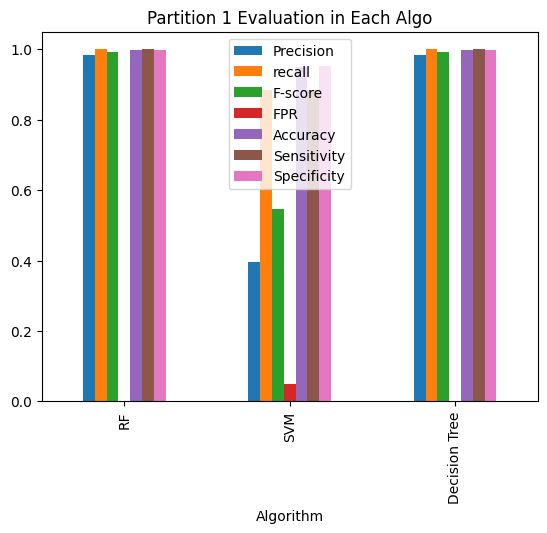

In [106]:
rt.plot(x= 'Algorithm', y = ['Precision','recall','F-score','FPR','Accuracy','Sensitivity','Specificity'], kind='bar', title='Partition 1 Evaluation in Each Algo')

In [107]:
rt2 = cdf[cdf['Partition']==2]
rt2

,Algorithm,Partition,Precision,recall,F-score,FPR,Accuracy,Sensitivity,Specificity
1,RF,2,0.981481,1.000000,0.990654,0.001425,0.998675,1.000000,0.998575
6,SVM,2,0.240741,0.812500,0.371429,0.055480,0.941722,0.812500,0.944520
11,Decision Tree,2,0.962963,0.981132,0.971963,0.002849,0.996026,0.981132,0.997151


<AxesSubplot: title={'center': 'Partition 2 Evaluation in Each Algo'}, xlabel='Algorithm'>

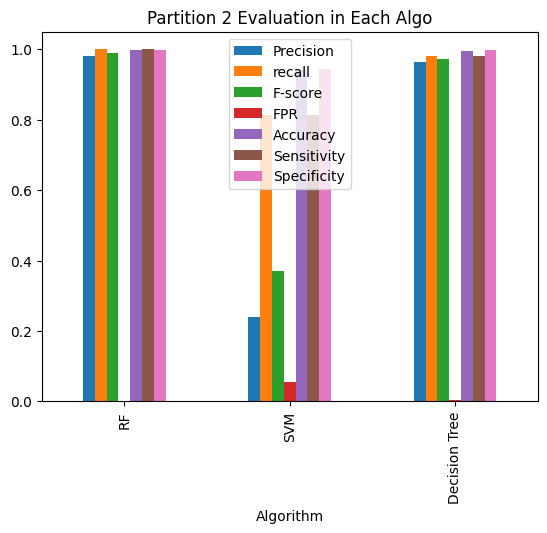

In [108]:
rt2.plot(x= 'Algorithm', y = ['Precision','recall','F-score','FPR','Accuracy','Sensitivity','Specificity'],kind='bar',title='Partition 2 Evaluation in Each Algo')


In [109]:
px.bar(rt,x='Algorithm',y='Accuracy')

In [110]:
px.scatter_3d(cdf,x='Partition',y='Algorithm',z='Precision',height=600)

In [111]:
import seaborn as sns

<AxesSubplot: xlabel='Partition', ylabel='Precision'>

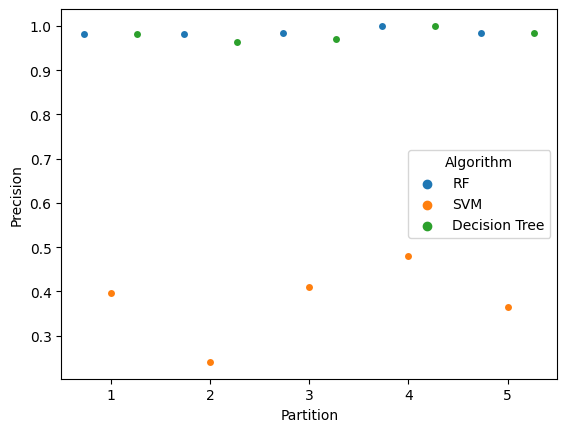

In [112]:
sns.stripplot(
    data=cdf, x="Partition", y="Precision", hue="Algorithm",
    dodge=True, legend=True
)

[Text(25.222222222222214, 0.5, 'Recall')]

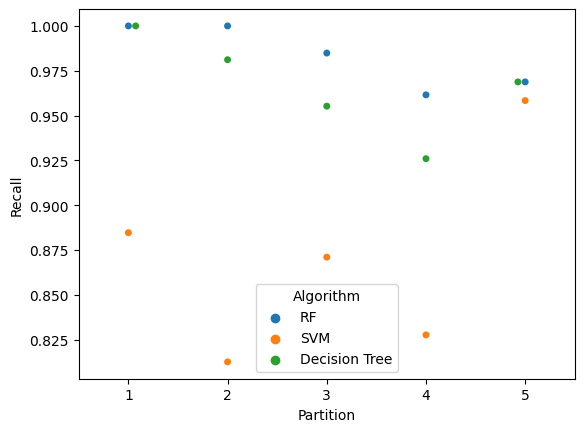

In [113]:
ax = sns.swarmplot(data=cdf, x="Partition", y="recall", hue="Algorithm")
ax.set(ylabel="Recall")

In [114]:
cdf

,Algorithm,Partition,Precision,recall,F-score,FPR,Accuracy,Sensitivity,Specificity
0,RF,1,0.982759,1.000000,0.991304,0.001433,0.998675,1.000000,0.998567
1,RF,2,0.981481,1.000000,0.990654,0.001425,0.998675,1.000000,0.998575
2,RF,3,0.984848,0.984848,0.984848,0.001453,0.997347,0.984848,0.998547
3,RF,4,1.000000,0.961538,0.980392,0.000000,0.997347,0.961538,1.000000
4,RF,5,0.984127,0.968750,0.976378,0.001449,0.996021,0.968750,0.998551
5,SVM,1,0.396552,0.884615,0.547619,0.048011,0.949669,0.884615,0.951989
6,SVM,2,0.240741,0.812500,0.371429,0.055480,0.941722,0.812500,0.944520
7,SVM,3,0.409091,0.870968,0.556701,0.053942,0.942971,0.870968,0.946058
8,SVM,4,0.480000,0.827586,0.607595,0.035862,0.958886,0.827586,0.964138
9,SVM,5,0.365079,0.958333,0.528736,0.054795,0.945623,0.958333,0.945205


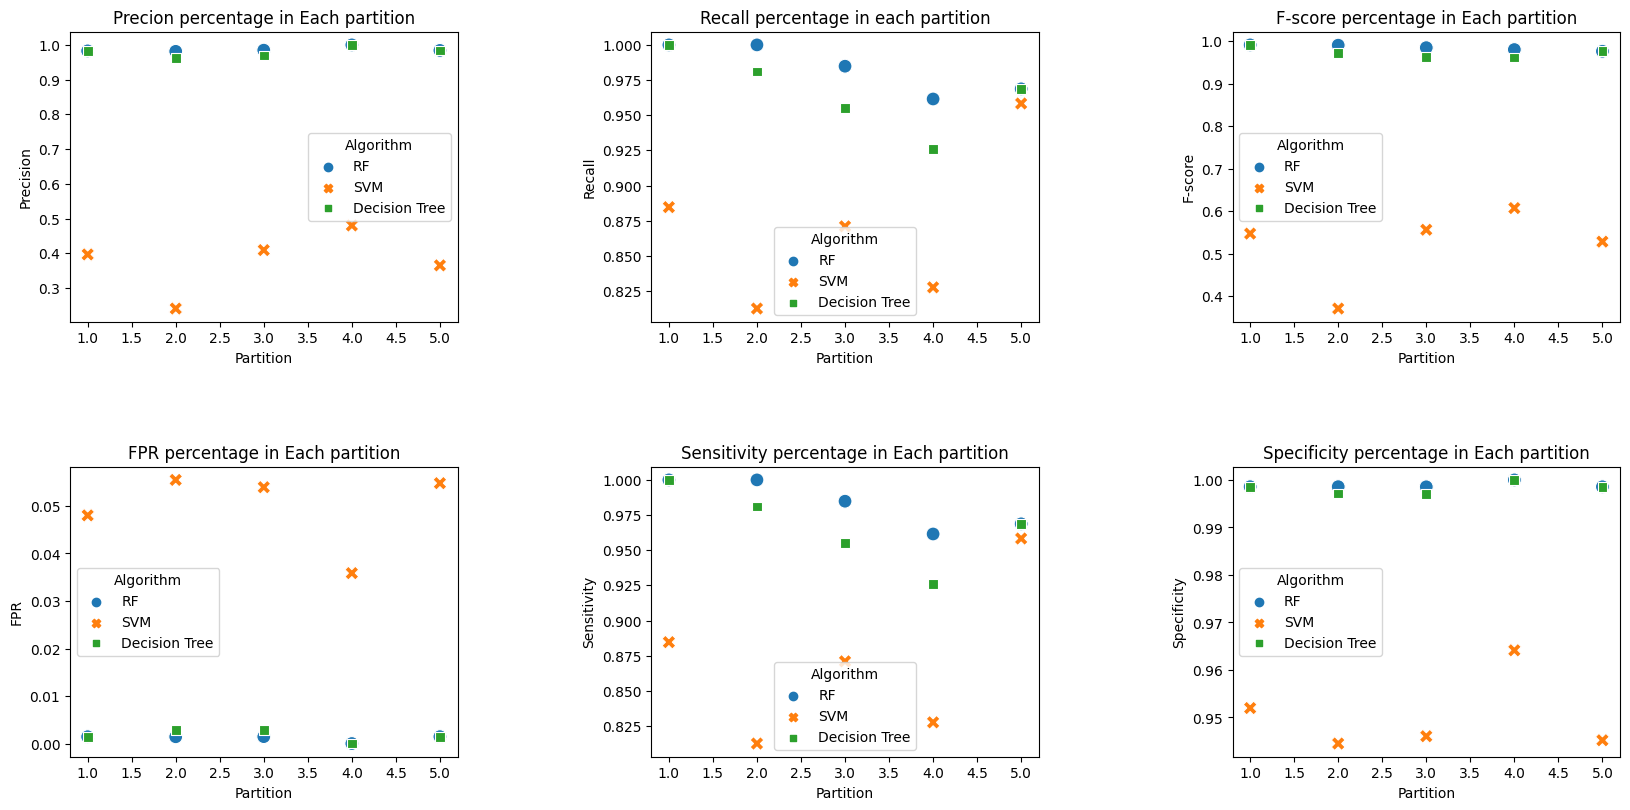

In [122]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 5))

# Scatter plot on the first subplot
sns.scatterplot(x='Partition', y='Precision',data=cdf, ax=axes[0,0],hue='Algorithm',style="Algorithm",s=100)
axes[0,0].set_xlabel('Partition')
axes[0,0].set_ylabel('Precision')
axes[0,0].set_title('Precion percentage in Each partition')

# Scatter plot on the second subplot
sns.scatterplot(x='Partition', y='recall',data=cdf, ax=axes[0,1],hue='Algorithm',style="Algorithm",s=100)
axes[0,1].set_xlabel('Partition')
axes[0,1].set_ylabel('Recall')
axes[0,1].set_title('Recall percentage in each partition')

# Scatter plot on the third subplot
sns.scatterplot(x='Partition', y='F-score',data=cdf,ax=axes[0,2],hue='Algorithm',style="Algorithm",s=100)
axes[0,2].set_xlabel('Partition')
axes[0,2].set_ylabel('F-score')
axes[0,2].set_title('F-score percentage in Each partition')



# second row

sns.scatterplot(x='Partition', y='FPR',data=cdf, ax=axes[1,0],hue='Algorithm',style="Algorithm",s=100)
axes[1,0].set_xlabel('Partition')
axes[1,0].set_ylabel('FPR')
axes[1,0].set_title('FPR percentage in Each partition')

# Scatter plot on the second subplot
sns.scatterplot(x='Partition', y='Sensitivity',data=cdf, ax=axes[1,1],hue='Algorithm',style="Algorithm",s=100)
axes[1,1].set_xlabel('Partition')
axes[1,1].set_ylabel('Sensitivity')
axes[1,1].set_title('Sensitivity percentage in Each partition')

# Scatter plot on the third subplot
sns.scatterplot(x='Partition', y='Specificity',data=cdf,ax=axes[1,2],hue='Algorithm',style="Algorithm",s=100)
axes[1,2].set_xlabel('Partition')
axes[1,2].set_ylabel('Specificity')
axes[1,2].set_title('Specificity percentage in Each partition')


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(top=1.5, bottom=0.05,hspace=0.5)


# Display the figure
plt.show()


<AxesSubplot: xlabel='Partition', ylabel='Accuracy'>

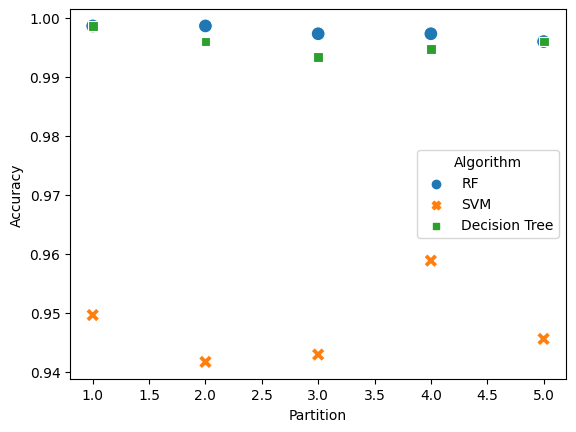

In [123]:
sns.scatterplot(x='Partition', y='Accuracy',data=cdf,hue='Algorithm',style="Algorithm",s=100)

# Pass 2

In [117]:
cdf2 = pd.DataFrame(columns=['Algorithm','Partition','Sub partition','Precision','recall','F-score','FPR','Accuracy','Sensitivity','Specificity']) # creating an empty Dataframe with some columns

In [118]:
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
# print(indices)
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the model on different partitions
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the machine learning model on the training set
    model = RandomForestRegressor(n_estimators=200, random_state=20)
    model.fit(X_train, y_train)

    # Test the machine learning model on the remaining partitions
    for j, (train_index2, test_index2) in enumerate(kf.split(X)):
        if j != i:
            X_train2, X_test2 = X[train_index2], X[test_index2]
            y_train2, y_test2 = y[train_index2], y[test_index2]
            
            y_pred = model.predict(X_test2)
            predicted_integers = [int(round(value)) for value in y_pred]
            a = confusion_matrix(y_test2,predicted_integers)

            
            precision = a[0][0]/(a[0][0]+a[0][1])
            recall = a[0][0]/(a[0][0]+a[1][0])
            F_score = (2*(precision*recall))/(precision+recall)
            Fal_ps_r = a[0][1]/(a[0][1]+a[1][1])
            Accuracy = (a[0][0]+a[1][1])/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
            Sensitivity = a[0][0]/(a[0][0]+a[1][0])
            Specificity = a[1][1]/(a[1][1]+a[0][1]) 
            row = ['RFC',i+1,j+1,precision,recall,F_score,Fal_ps_r,Accuracy,Sensitivity,Specificity]
            cdf2.loc[len(cdf2)] = row



# SVM

X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
# print(indices)
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the model on different partitions
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the machine learning model on the training set
    model = SVC()
    model.fit(X_train, y_train)

    # Test the machine learning model on the remaining partitions
    for j, (train_index2, test_index2) in enumerate(kf.split(X)):
        if j != i:
            X_train2, X_test2 = X[train_index2], X[test_index2]
            y_train2, y_test2 = y[train_index2], y[test_index2]
            
            y_pred = model.predict(X_test2)
            predicted_integers = [int(round(value)) for value in y_pred]
            a = confusion_matrix(y_test2,predicted_integers)

            
            precision = a[0][0]/(a[0][0]+a[0][1])
            recall = a[0][0]/(a[0][0]+a[1][0])
            F_score = (2*(precision*recall))/(precision+recall)
            Fal_ps_r = a[0][1]/(a[0][1]+a[1][1])
            Accuracy = (a[0][0]+a[1][1])/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
            Sensitivity = a[0][0]/(a[0][0]+a[1][0])
            Specificity = a[1][1]/(a[1][1]+a[0][1]) 
            row = ['SVM',i+1,j+1,precision,recall,F_score,Fal_ps_r,Accuracy,Sensitivity,Specificity]
            cdf2.loc[len(cdf2)] = row




# Decision tree

X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
# print(indices)
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the model on different partitions
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the machine learning model on the training set
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Test the machine learning model on the remaining partitions
    for j, (train_index2, test_index2) in enumerate(kf.split(X)):
        if j != i:
            X_train2, X_test2 = X[train_index2], X[test_index2]
            y_train2, y_test2 = y[train_index2], y[test_index2]
            
            y_pred = model.predict(X_test2)
            predicted_integers = [int(round(value)) for value in y_pred]
            a = confusion_matrix(y_test2,predicted_integers)

            
            precision = a[0][0]/(a[0][0]+a[0][1])
            recall = a[0][0]/(a[0][0]+a[1][0])
            F_score = (2*(precision*recall))/(precision+recall)
            Fal_ps_r = a[0][1]/(a[0][1]+a[1][1])
            Accuracy = (a[0][0]+a[1][1])/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
            Sensitivity = a[0][0]/(a[0][0]+a[1][0])
            Specificity = a[1][1]/(a[1][1]+a[0][1]) 
            row = ['Decision Tree',i+1,j+1,precision,recall,F_score,Fal_ps_r,Accuracy,Sensitivity,Specificity]
            cdf2.loc[len(cdf2)] = row

In [119]:
cdf2

,Algorithm,Partition,Sub partition,Precision,recall,F-score,FPR,Accuracy,Sensitivity,Specificity
0,RFC,1,2,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
1,RFC,1,3,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
2,RFC,1,4,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
3,RFC,1,5,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
4,RFC,2,1,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
5,RFC,2,3,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
6,RFC,2,4,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
7,RFC,2,5,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
8,RFC,3,1,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
9,RFC,3,2,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000


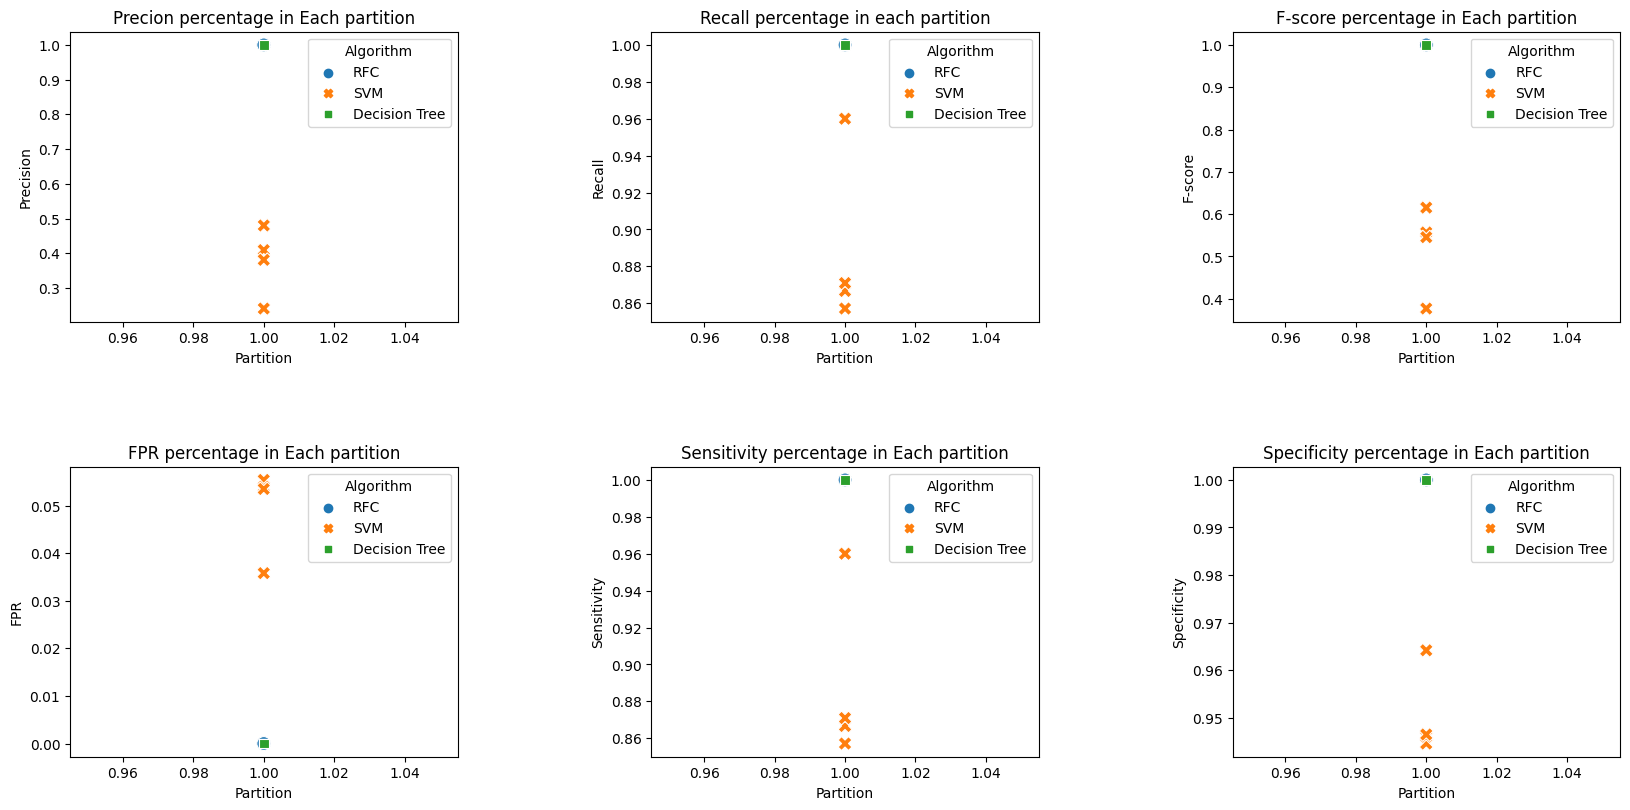

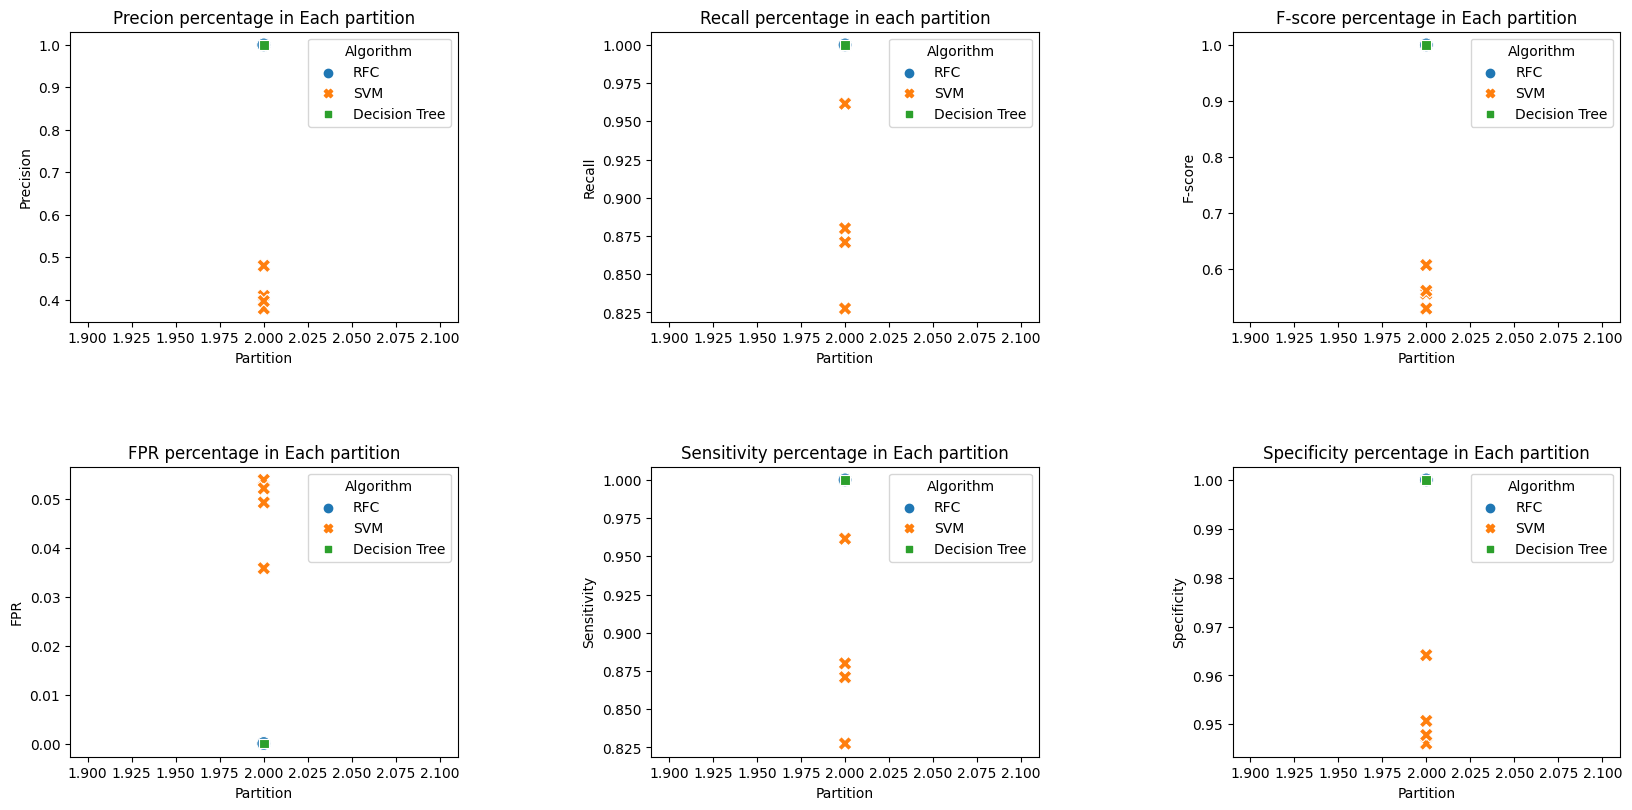

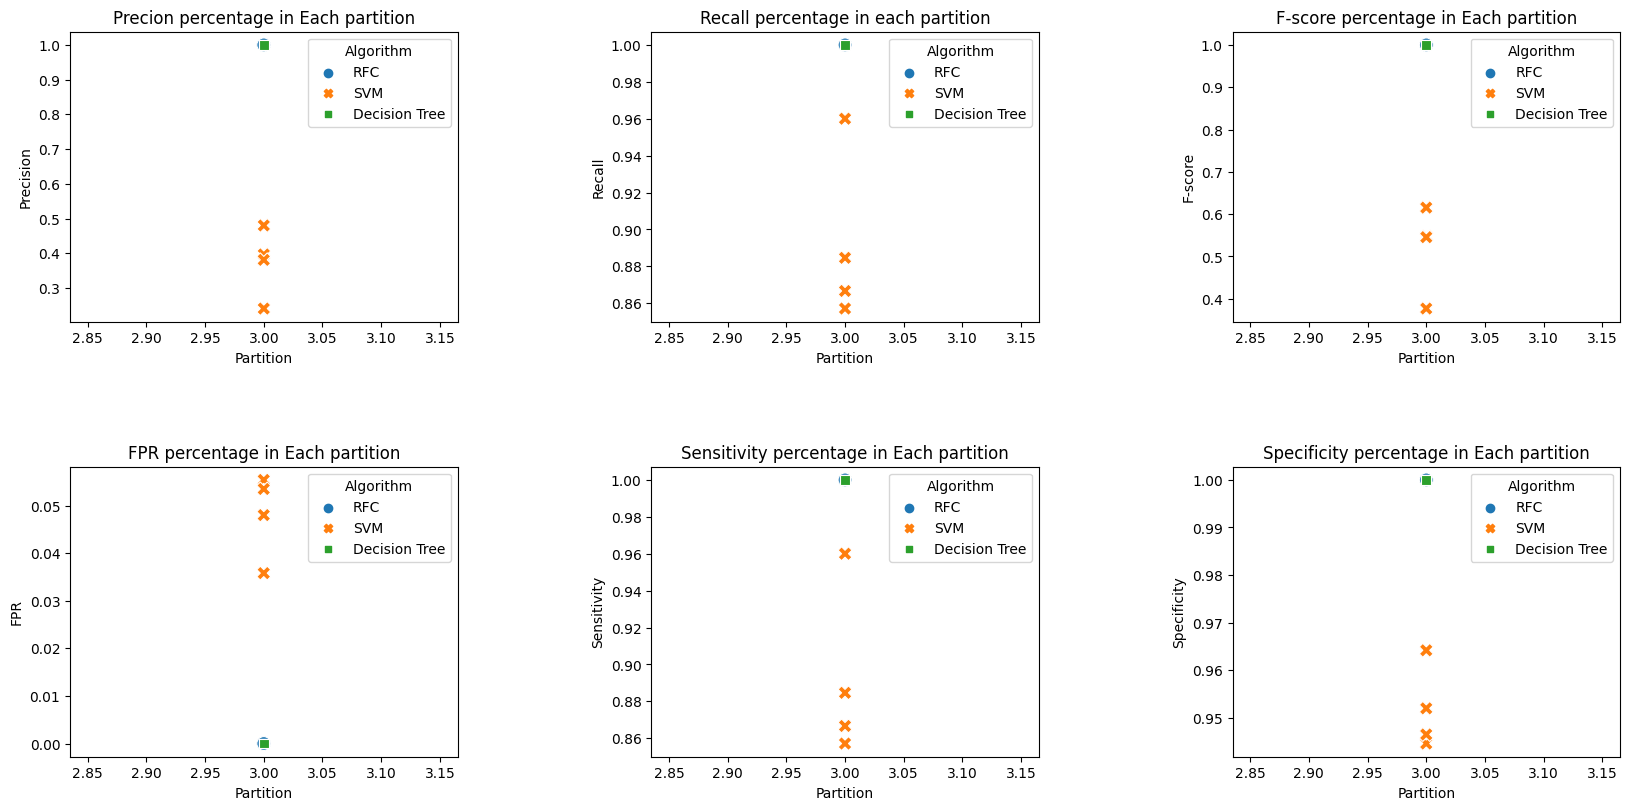

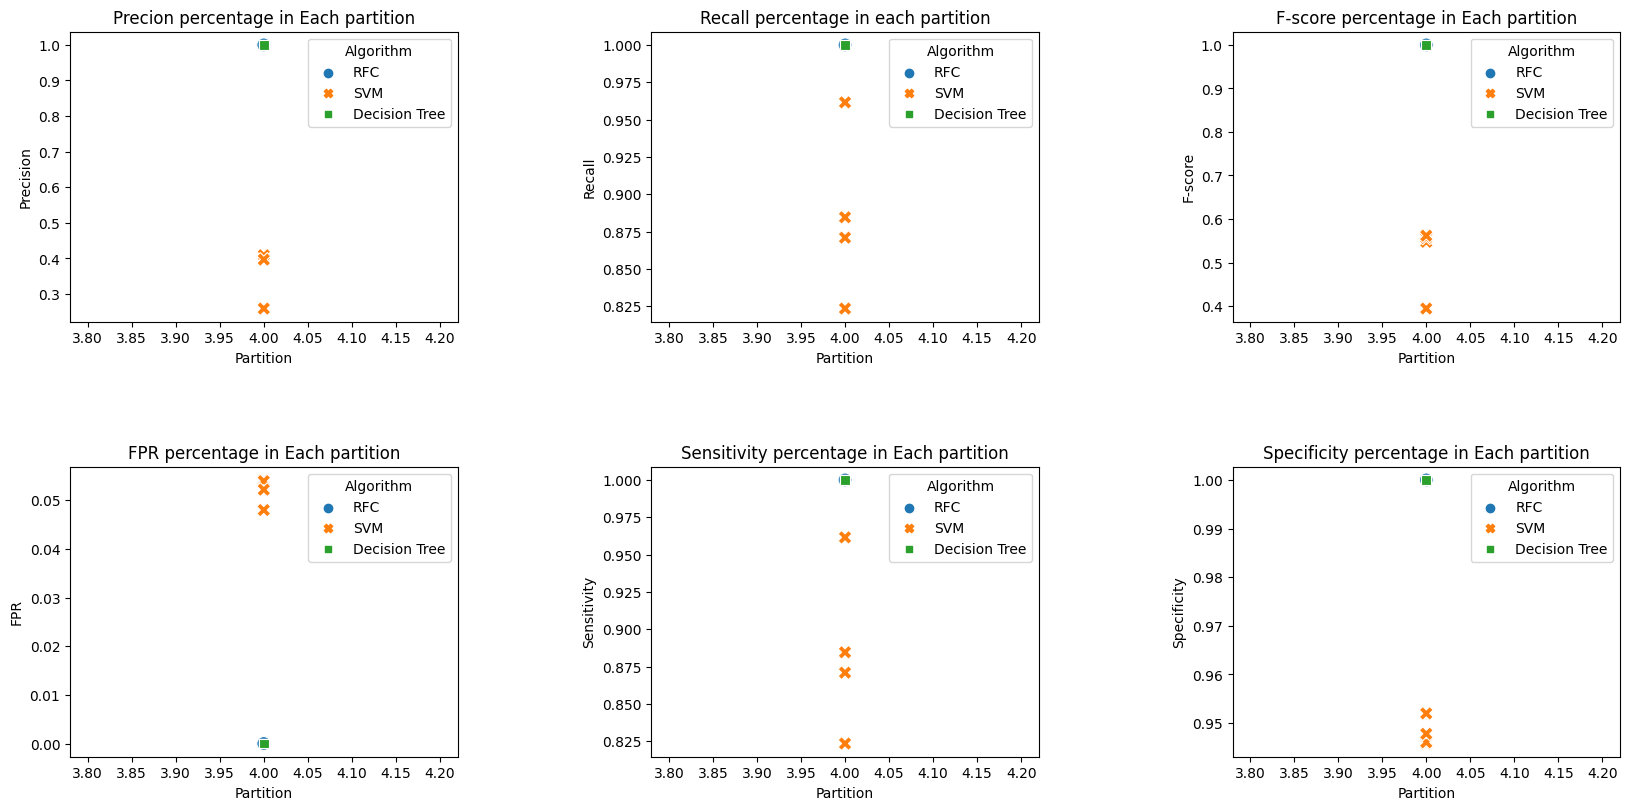

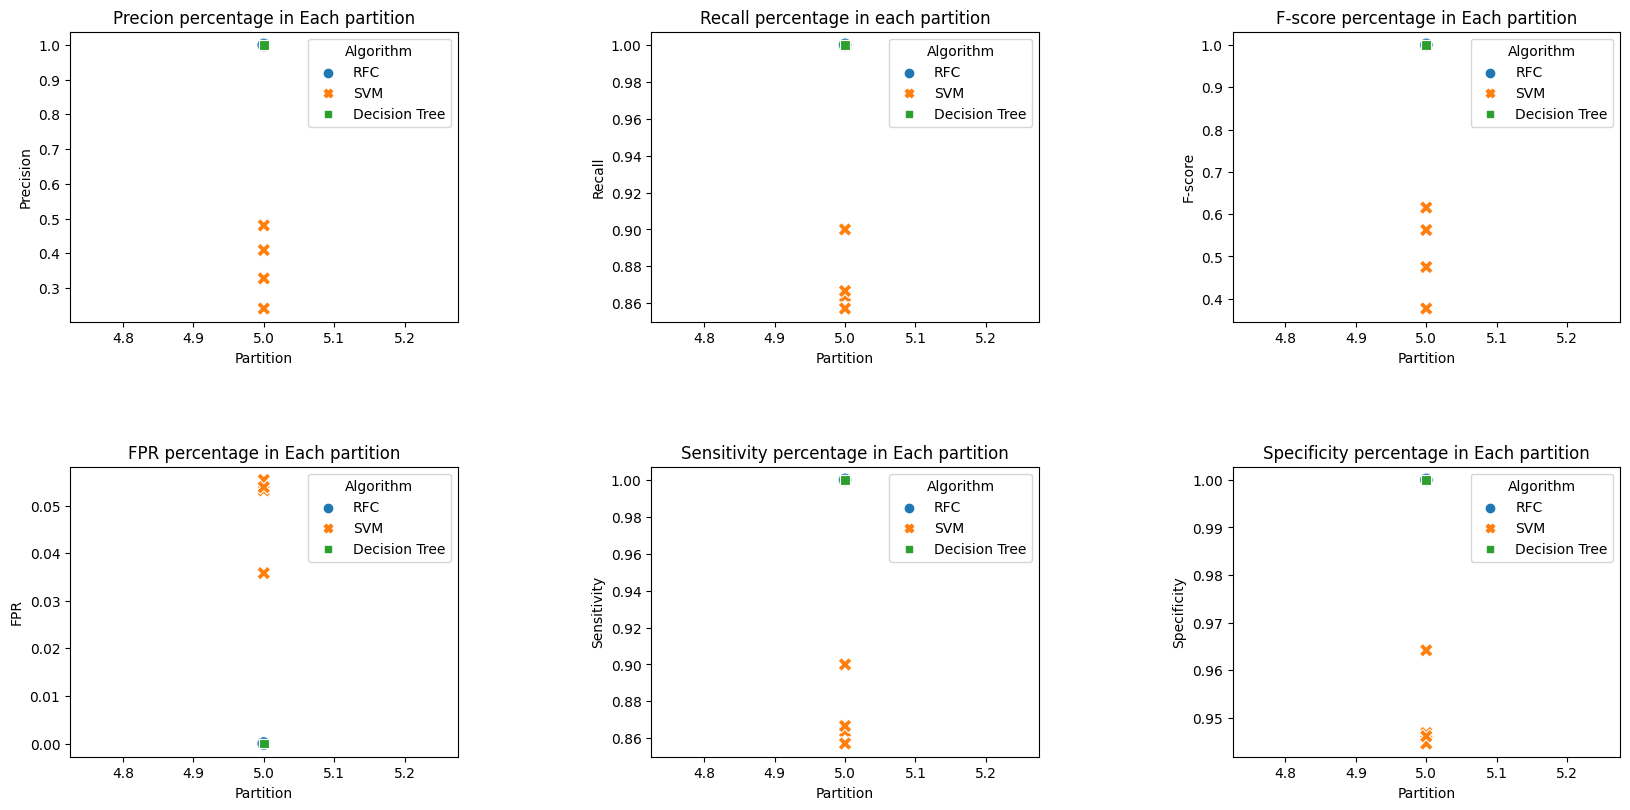

In [150]:
for i in range(1,6):
    p1 = cdf2[cdf2['Partition'] == i]
    # Create a figure with 1 row and 3 columns
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 5))

    # Scatter plot on the first subplot
    sns.scatterplot(x='Partition', y='Precision',data=p1, ax=axes[0,0],hue='Algorithm',style="Algorithm",s=100)
    axes[0,0].set_xlabel('Partition')
    axes[0,0].set_ylabel('Precision')
    axes[0,0].set_title('Precion percentage in Each partition')

    # Scatter plot on the second subplot
    sns.scatterplot(x='Partition', y='recall',data=p1, ax=axes[0,1],hue='Algorithm',style="Algorithm",s=100)
    axes[0,1].set_xlabel('Partition')
    axes[0,1].set_ylabel('Recall')
    axes[0,1].set_title('Recall percentage in each partition')

    # Scatter plot on the third subplot
    sns.scatterplot(x='Partition', y='F-score',data=p1,ax=axes[0,2],hue='Algorithm',style="Algorithm",s=100)
    axes[0,2].set_xlabel('Partition')
    axes[0,2].set_ylabel('F-score')
    axes[0,2].set_title('F-score percentage in Each partition')



    # second row

    sns.scatterplot(x='Partition', y='FPR',data=p1, ax=axes[1,0],hue='Algorithm',style="Algorithm",s=100)
    axes[1,0].set_xlabel('Partition')
    axes[1,0].set_ylabel('FPR')
    axes[1,0].set_title('FPR percentage in Each partition')

    # Scatter plot on the second subplot
    sns.scatterplot(x='Partition', y='Sensitivity',data=p1, ax=axes[1,1],hue='Algorithm',style="Algorithm",s=100)
    axes[1,1].set_xlabel('Partition')
    axes[1,1].set_ylabel('Sensitivity')
    axes[1,1].set_title('Sensitivity percentage in Each partition')

    # Scatter plot on the third subplot
    sns.scatterplot(x='Partition', y='Specificity',data=p1,ax=axes[1,2],hue='Algorithm',style="Algorithm",s=100)
    axes[1,2].set_xlabel('Partition')
    axes[1,2].set_ylabel('Specificity')
    axes[1,2].set_title('Specificity percentage in Each partition')


    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.5)
    plt.subplots_adjust(top=1.5, bottom=0.05,hspace=0.5)


    # Display the figure
    plt.show()


In [176]:
fig = px.scatter_3d(p1, x='Partition', y='Precision', z='Sub partition'
              ,color='Algorithm',symbol='Algorithm')
fig.show()

In [175]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Generate some sample data
import numpy as np
np.random.seed(0)
n = 50
x1 = np.random.rand(n)
y1 = np.random.rand(n)
z1 = np.random.rand(n)
x2 = np.random.rand(n)
y2 = np.random.rand(n)
z2 = np.random.rand(n)
x3 = np.random.rand(n)
y3 = np.random.rand(n)
z3 = np.random.rand(n)

# Create subplots with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=['Subplot 1', 'Subplot 2', 'Subplot 3'], specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}]])

# Add 3D scatter traces to each subplot
fig.add_trace(go.Scatter3d(x=x1, y=y1, z=z1, mode='markers', name='Trace 1',), row=1, col=1)
fig.add_trace(go.Scatter3d(x=x2, y=y2, z=z2, mode='markers', name='Trace 2'), row=1, col=2)
fig.add_trace(go.Scatter3d(x=x3, y=y3, z=z3, mode='markers', name='Trace 3'), row=1, col=3)

# Update layout
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
), title='3D Scatter Subplots')

# Display the plot
fig.show()


In [177]:
acc_com = pd.read_excel("Accuracy Comparision.xlsx")

In [178]:
acc_com

,Algorithm,Accuracy,model creator
0,SVM,94.5,Anukul
1,Random Forest,99.6,Anukul
2,Decision Tree,99.6,Anukul
3,SVM,89.5,saima
4,Random Forest,94.7,saima
5,Decision Tree,94.3,saima
6,SVM,99.3,Md Riajuliislam
7,Random Forest,99.3,Md Riajuliislam
8,Decision Tree,99.3,Md Riajuliislam
9,SVM,92.5,Khalid salman


<AxesSubplot: xlabel='Algorithm', ylabel='Accuracy'>

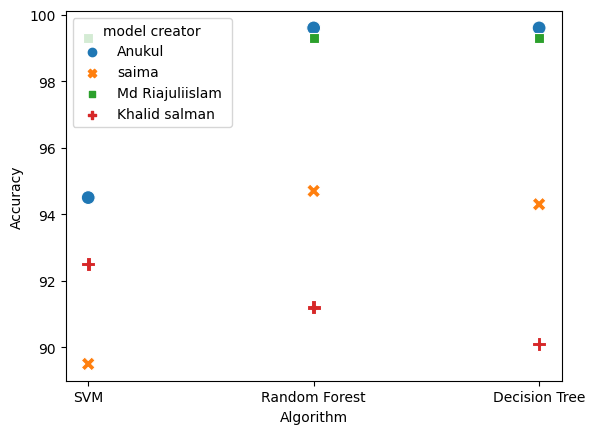

In [182]:
sns.scatterplot(x='Algorithm', y='Accuracy',data=acc_com,hue='model creator',style="model creator",s=100)

<AxesSubplot: xlabel='Accuracy', ylabel='Algorithm'>

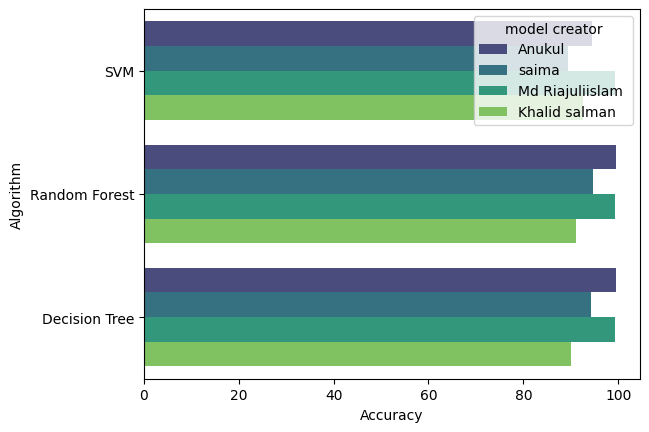

In [187]:
sns.barplot(x='Accuracy',y='Algorithm',hue='model creator',data=acc_com,palette='viridis')